In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [116]:
def read_file(path):
    data = pd.read_csv(path, sep = r'\t')
    new_data = preprocess_data(data)
    return new_data

def preprocess_data(data):
    for col in data.columns:
        if data[col].isnull().sum() > 0 :
            data[col] = data[col].fillna(data[col].median())
        else:
            continue
    for col in data.columns:
        if col == 'Dt_Customer':
            data[col] = pd.to_datetime(data[col], format = 'mixed', dayfirst = True)
    data = pd.get_dummies(data, dtype=int)
    return data

def k_means(data):
    features = [
              'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 
              'Education_Master', 'Education_PhD', 'Marital_Status_Married'
    ]
    A = data[features]

    scaler = StandardScaler()
    A_scaled = scaler.fit_transform(A)

    inertia = []
    c = range(1,11)
    for x in c:
        kmeans_model = KMeans(n_clusters=x, random_state=42)
        kmeans_model.fit(A_scaled)
        inertia.append(kmeans_model.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(c, inertia, marker='o')
    plt.xlabel('# of Clusters')
    plt.ylabel('Inertia')
    plt.title('Optimal Number of Clusters')
    plt.show()

def hiearchical_clustering(data):
    features = [
              'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 
              'Education_Master', 'Education_PhD', 'Marital_Status_Married'
    ]
    A = data[features]

    scaler = StandardScaler()
    scaled = scaler.fit_transform(A)

    linked = linkage(scaled, method = 'ward')

    plt.figure(figsize=(8, 8))
    dendrogram(linked, truncate_mode='lastp', p=30)
    plt.xlabel("Sample index or Cluster size")
    plt.ylabel("Distance")
    plt.title("Dendrogram for Hierarchical Clustering")
    plt.show()



In [117]:
data = read_file('marketing_campaign.csv')

/var/folders/cq/x6p1bml53zs0fv1z7r55064m0000gn/T/ipykernel_94084/313953806.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(path, sep = r'\t')


### 1.
I handeled the null values by using a for loop. And in the for loop, if I find any columns with null values greater than 0, I fill them in with the median. This is dispalyed in preprocess_data function below. I am also using one-hot encoding to normalize the data by using pd.get dummies and a for loop. This code is also in the same function as the null code is and basically changes categorical columns to numerical columns.

In [118]:
data.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,0,0,0,0,0,0,1,0,0,0
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,0,0,0,0,0,0,1,0,0,0
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,0,0,0,0,0,1,0,0
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,0,0,0,0,0,0,0,1,0,0
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,0,1,0,0,0,1,0,0,0,0


### 2.
The ideal number of clusters would be about 4 to 5. To figure this out, I used an elbow plot because it effectively shows how the inertia changes as the number of clusters increases. An elbow point also helps identify the point where adding more clusters no longer yields substantial benefits.

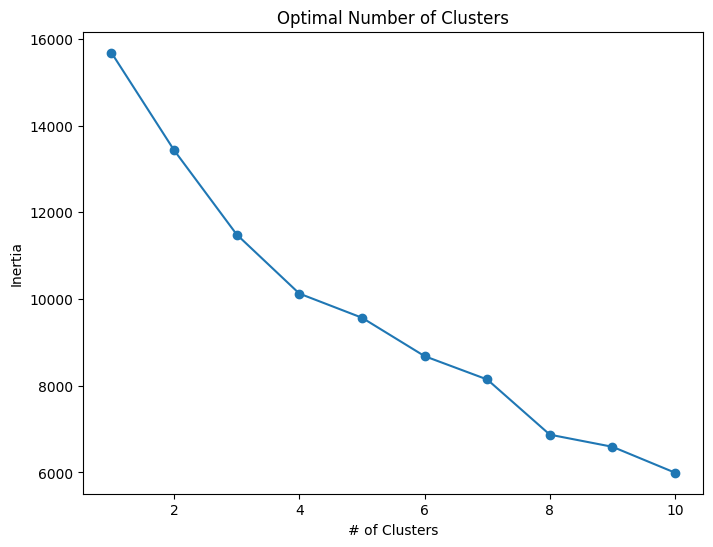

In [119]:
k_means(data)

### 3.
By looking at the Dendrogram, the ideal number of clusters would be 4. I used a dendorgram to determine Hiearchical Clustering because it is a visual appealing and clear way to figure out the ideal number of clusters for this dataset. It also displays hierarchical relationships among data points, which helps us see the structure of clusters as different levels of granularity.

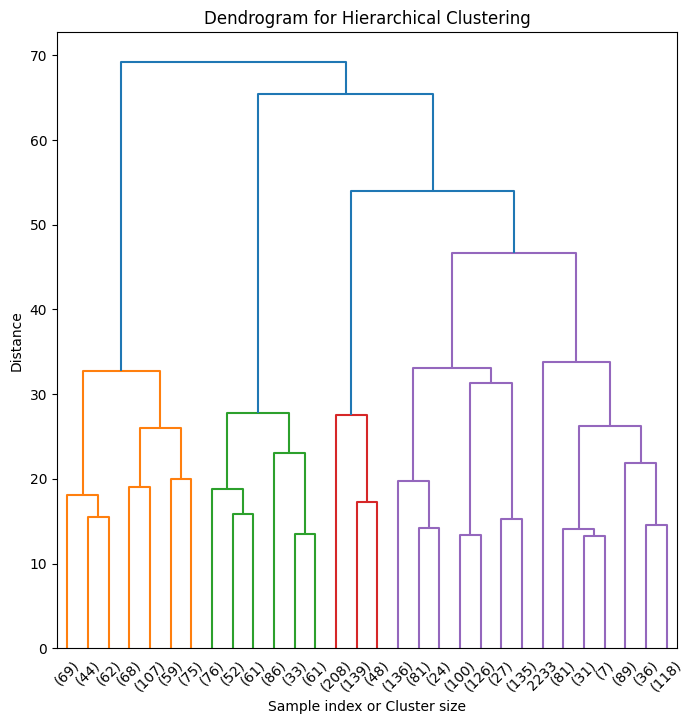

In [120]:
hiearchical_clustering(data)

### 4. 
From looking at the results for K means and hierarchical clustering, I've determined that K means is the best appraoch to determining the number of clusters. K means is computationally more efficent on a computer machine since it doesn’t take long or create linkages like Hierarchial clustering does. The optimal number of clusters in K means was 5 while in hierarchial clustering it was 4, telling us that k means was performing better than hierarchal clustering. By these factors alone, K means is definetley a better approach.